In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('hp.csv')
df.head()

,Date,Open,High,Low,Close
0,05/23/24,39694.95,39694.95,39025.51,39065.26
1,05/22/24,39863.33,39890.91,39559.09,39671.04
2,05/21/24,39804.40,39905.80,39778.73,39872.99
3,05/20/24,39989.76,40077.40,39787.09,39806.77
4,05/17/24,39911.72,40010.88,39858.86,40003.59


In [4]:
df = df.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})
#it is said to be good practice if we rename every column by ourself only

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by = 'Date')

C:\Users\sumit\AppData\Local\Temp\ipykernel_5300\798441811.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df.head()

,Date,Open,High,Low,Close
62,2024-02-26,39144.79,39245.89,39025.80,39069.23
61,2024-02-27,39087.90,39087.90,38881.90,38972.41
60,2024-02-28,38938.08,38956.46,38741.68,38949.02
59,2024-02-29,39013.75,39074.13,38809.28,38996.39
58,2024-03-01,38989.51,39120.36,38850.50,39087.38


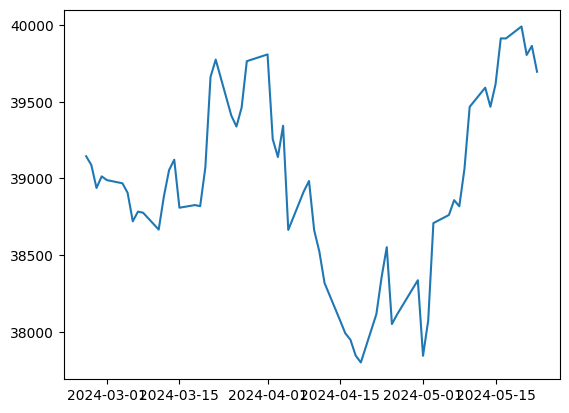

In [7]:
plt.plot(df['Date'],df['Open']) #here one thing to keep in mind is that first we pass value of x and than value of y
plt.show() 
# the above is line plot and we can also use multiple line plot to do so see below cell

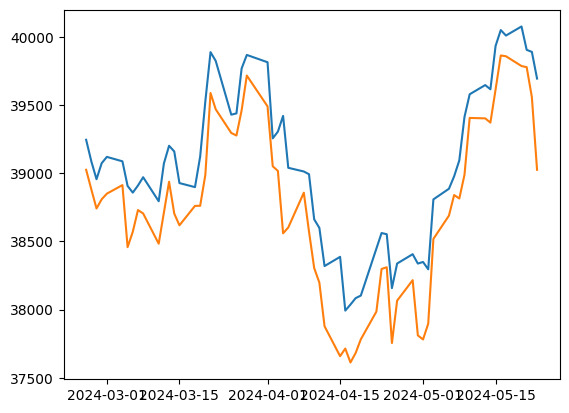

In [8]:
plt.plot(df['Date'],df['High'])
plt.plot(df['Date'],df['Low'])
plt.show()

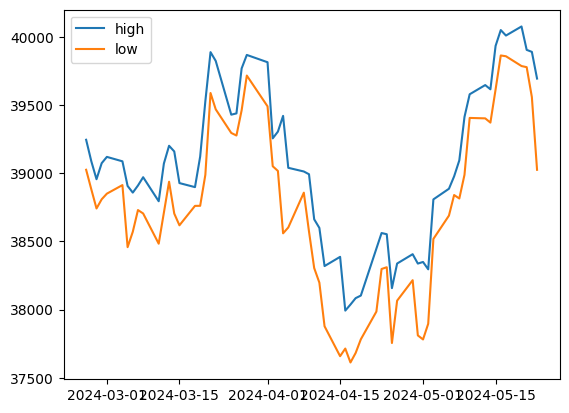

In [13]:
# One more thing we can do by this we are not able to sure 
# which line represents what so to recoginze we can use legend and to do  so
# we need to provide label also
plt.plot(df['Date'],df['High'], label="high")
plt.plot(df['Date'],df['Low'], label="low")
plt.legend()
plt.show()

In [15]:
# Import the calendar package 
from calendar import month_name
# Order by months by chronological order
df['Month'] = pd.Categorical(df['Date'].dt.month_name(), month_name[1:])
# Group metrics by monthly averages
df_monthly_mean = df \
.groupby('Month') \
.mean() \
.reset_index()
df_monthly_mean.head(6)

C:\Users\sumit\AppData\Local\Temp\ipykernel_5300\457698237.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Month') \


,Month,Date,Open,High,Low,Close
0,January,NaT,NaN,NaN,NaN,NaN
1,February,2024-02-27 12:00:00.000000000,39046.130000,39091.095000,38864.665000,38996.762500
2,March,2024-03-15 02:24:00.000000000,39090.646000,39239.157000,38950.232000,39105.520000
3,April,2024-04-14 22:54:32.727272704,38504.349545,38628.500455,38246.146364,38401.217273
4,May,2024-05-12 04:14:07.058823424,39261.839412,39425.600000,39129.317059,39275.576471
5,June,NaT,NaN,NaN,NaN,NaN


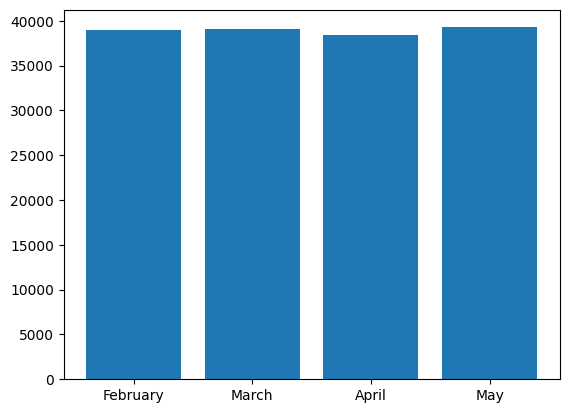

In [18]:
# Bar plots are very useful for comparing numerical values across categories. 
# They are particularly helpful for finding the largest and smallest categories. 
# Vertical Bar Plots
plt.bar(df_monthly_mean['Month'], height = df_monthly_mean['Close'])
plt.show()

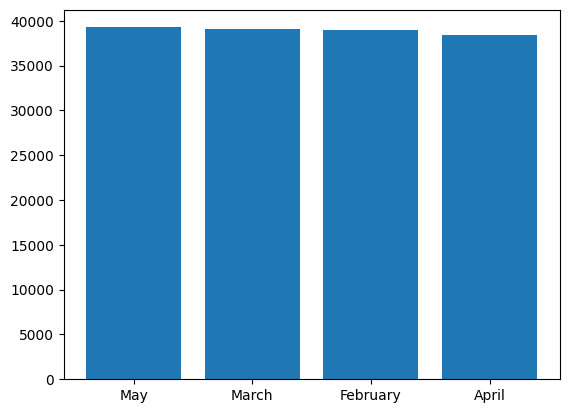

In [19]:
# we can also sort the values to see clearly 
djia_monthly_mean_srtd = df_monthly_mean.sort_values(by = 'Close', ascending = False)
plt.bar(djia_monthly_mean_srtd['Month'], height = djia_monthly_mean_srtd['Close'])
plt.show() #here we are sorting the values and than we are rendering the values and than
# we can see we get it

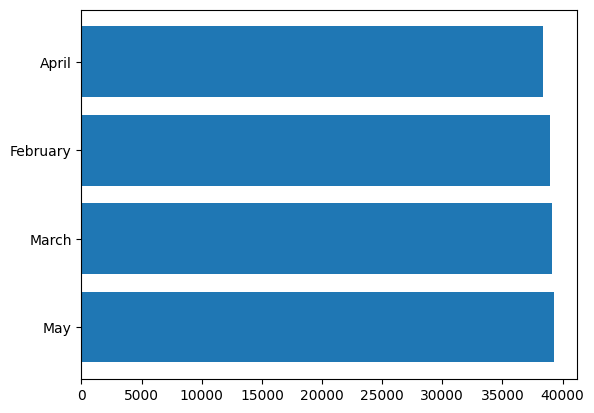

In [25]:
# sometimes we need horizontal bar plot to visulaize our dataset
plt.barh(djia_monthly_mean_srtd['Month'], width = djia_monthly_mean_srtd['Close'])
plt.show() #one thing to notice here is that in this width is very important to go further 

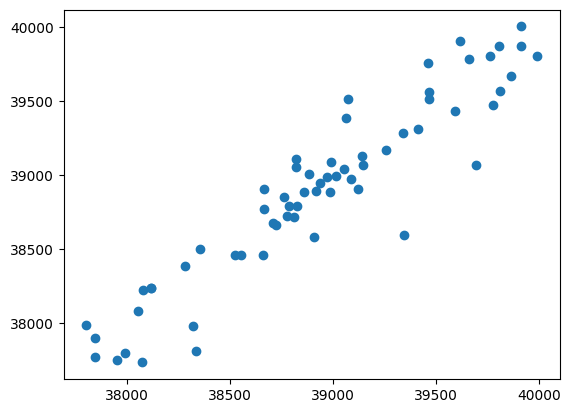

In [26]:
# Scatter Plots
# Scatterplots are very useful for identifying relationships between 2 numeric variables. 
# This can give you a sense of what to expect in a variable when the other variable changes 
# and can also be very informative in your decision to use different modeling techniques such 
# as linear or non-linear reg1. Identifying Relationships
# Scatter plots can reveal various types of relationships between variables:
# Linear Relationship: If the points form a straight-line pattern, a linear model might
# be appropriate.
#  Non-linear Relationship: If the points form a curved pattern, non-linear models
#     like polynomial regression might be suitable.
# No Relationship: If the points are randomly scattered with no discernible pattern, 
# there might be no relationship between the variablesression.

plt.scatter(df['Open'], df['Close'])
plt.show()

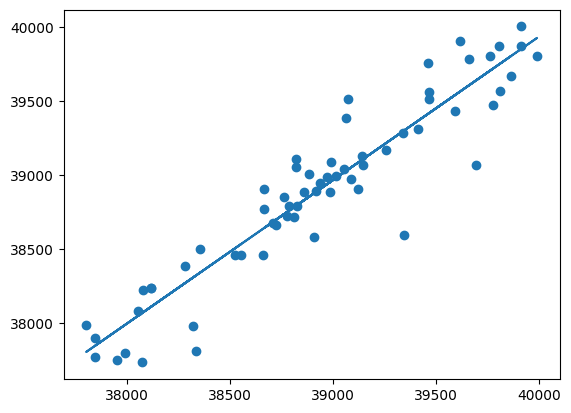

In [28]:
# • First, the np.polyfit() function is used to fit a first-degree polynomial (i.e., a straight line) to the data.
# • The resulting coefficients are stored in the variable z.
# • Next, the np.poly1d() function is used to create a polynomial function based on the coefficients in z.
z = np.polyfit(df['Open'], df['Close'], 1)
p = np.poly1d(z)


plt.scatter(df['Open'], df['Close'])
plt.plot(df['Open'], p(df['Open']))
plt.show()

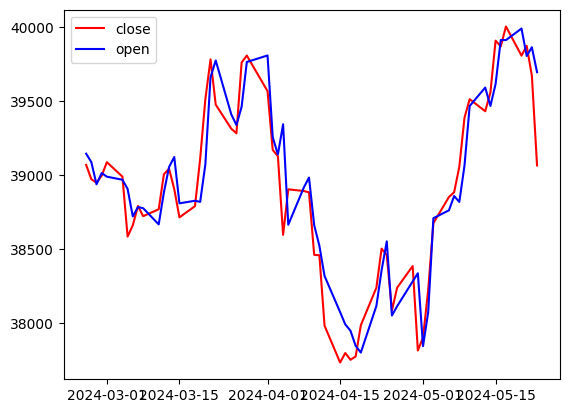

In [31]:
# to color line plot we can simply use color and it will color the line graph
plt.plot(df['Date'],df['Close'],color='red',label='close')
plt.plot(df['Date'],df['Open'],color='blue',label='open')
plt.legend()
plt.show()

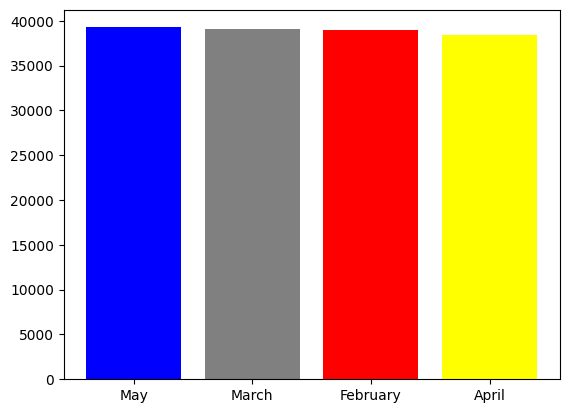

In [33]:
# now let see to color our bar graph
plt.bar(djia_monthly_mean_srtd['Month'], height = djia_monthly_mean_srtd['Close'], color = ['blue', 'gray', 'red', 'yellow'])
plt.show()

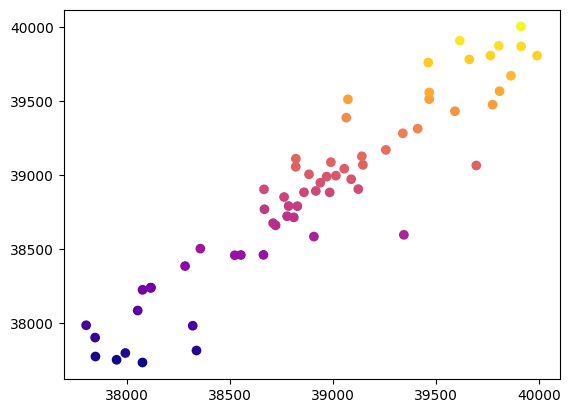

In [34]:
# Using Colormaps
# Colormaps are built-in Matplotlib colors that scale based on the magnitude of the value (documentation here). The colormaps generally aesthetically look good together and help tell a story 
# in the increasing values.
plt.scatter(df['Open'], df['Close'], c=df['Close'], cmap = plt.cm.plasma)
plt.show()

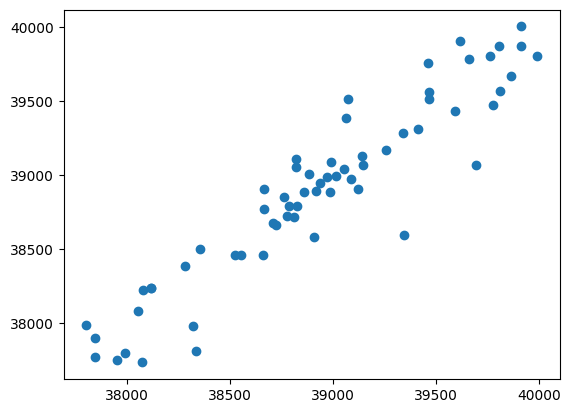

In [35]:
# we xan also save one of the fig if we want to do so
plt.scatter(df['Open'], df['Close'])
plt.savefig('DJIA 2022 Scatterplot Open vs. Close.png')

In [ ]:
# we can also set limit for any of x or y to do so 
# we can use 
# plt.xlim() and plt.ylim()

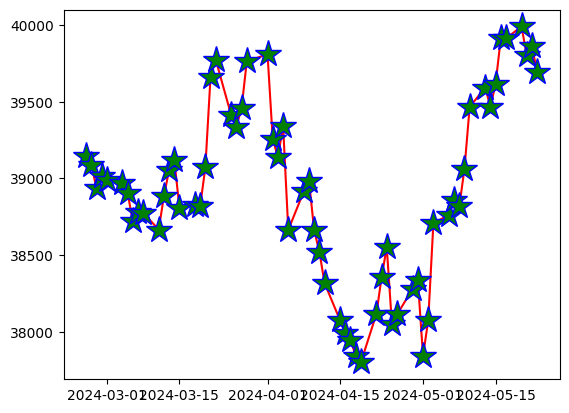

In [43]:
# there is also a marker with us so that we can select by which thing we want to set marker
# there is also marker size and it colors
# Format Strings fmt
# You can also use the shortcut string notation parameter to specify the marker.
# This parameter is also called fmt, and is written with this syntax:
# marker|line|color
# there is also markeredgecolor as mec and there is also markerfacecolor  as mfc
plt.plot(df['Date'],df['Open'],'*-r',ms=20,mec='b',mfc='g') #(*-r)this represents marker line color 
# here ms is used as marker size

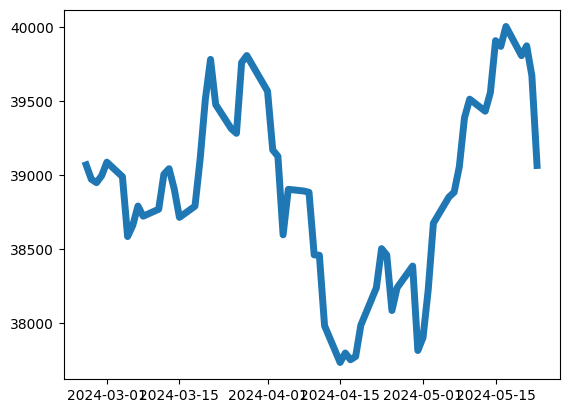

In [48]:
# there is also a linestyle in line plot in which only following are supported values are 
# '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
# there is also linewidth
plt.plot(df['Date'],df['Close'],linestyle='solid',linewidth=5)
plt.show()

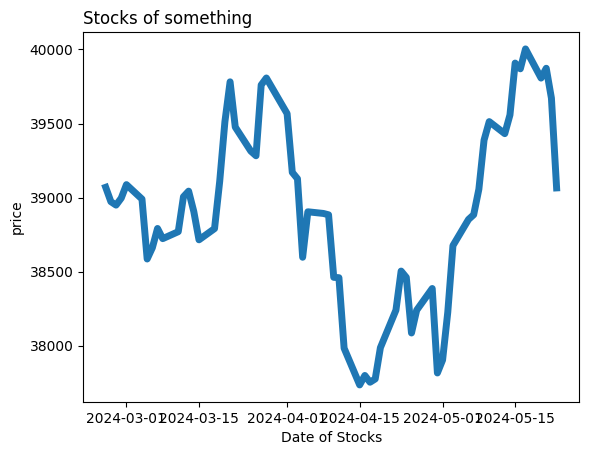

In [50]:
# there is also label and title in this 
# for title there is alsoLegal values are: 'left', 'right', and 'center'. Default value is 'center'.
plt.plot(df['Date'],df['Close'],linestyle='solid',linewidth=5)
plt.title('Stocks of something',loc='left')
plt.xlabel('Date of Stocks')
plt.ylabel('Price of stocks')
plt.show()

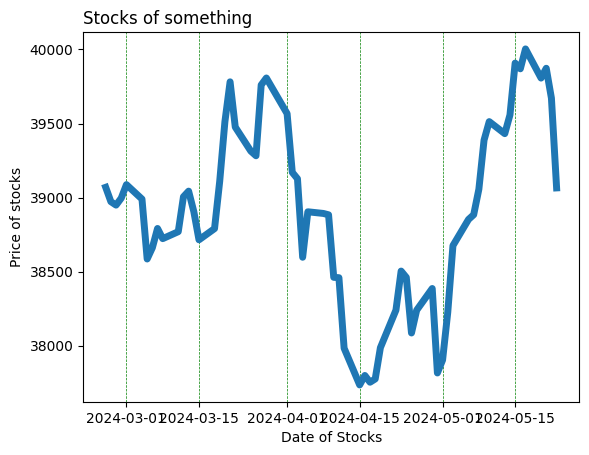

In [51]:
# there is also grid in it which as various parmeter in it like
# color = 'green', linestyle = '--', linewidth = 0.5,axis='y' these are just example 
# we can save it as we want
plt.plot(df['Date'],df['Close'],linestyle='solid',linewidth=5)
plt.title('Stocks of something',loc='left')
plt.grid(axis='x',color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel('Date of Stocks')
plt.ylabel('Price of stocks')
plt.show()

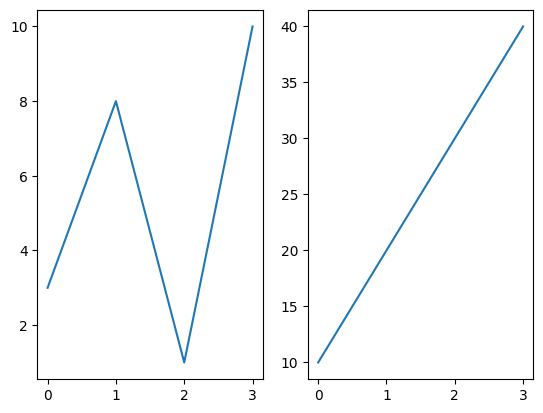

In [52]:
# to display multiple plot together we can use subplot this thing is very useful if we want 
# to display multiple graph at once
#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(1, 2, 1) #this fig as 1 row , 2 col and will be displayed first
plt.plot(x,y)

#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(1, 2, 2) #this fig as 1 row , 2 col and will be displayed second
plt.plot(x,y)

plt.show()

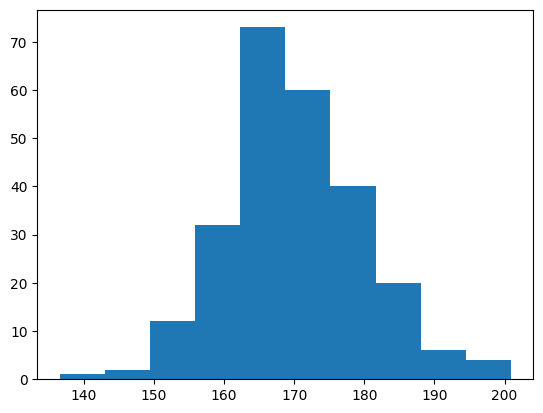

In [54]:
# there is also histogram with us
# A histogram is a graph showing frequency distributions.
x = np.random.normal(170, 10, 250)

plt.hist(x)
plt.show()

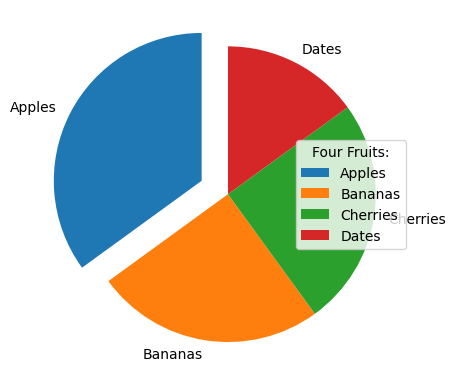

In [57]:
# we also have a pie with us
# in which various fields are included like 
# labels,explode,startangle
y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
expl=[0.2, 0, 0, 0]
plt.pie(y, labels = mylabels,startangle=90,explode=expl)
plt.legend(title = "Four Fruits:")
plt.show() 


In [ ]:
# matplotlib with timeseries 
# df['Date'] = pd.to_datetime(df['Date'])
# print(df['Date'].dtypes) #this way we can use datetime to get it in matplotlib

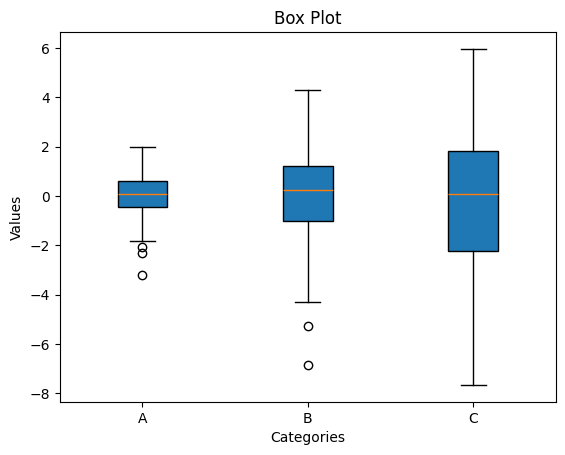

In [67]:
# there is box plot 
# box plot doesn't support timestamp
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

plt.boxplot(data, vert=True, patch_artist=True, labels=['A', 'B', 'C']) 
#here the use of vert is for keeping it vertical otherwise it will change to horizontal
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()

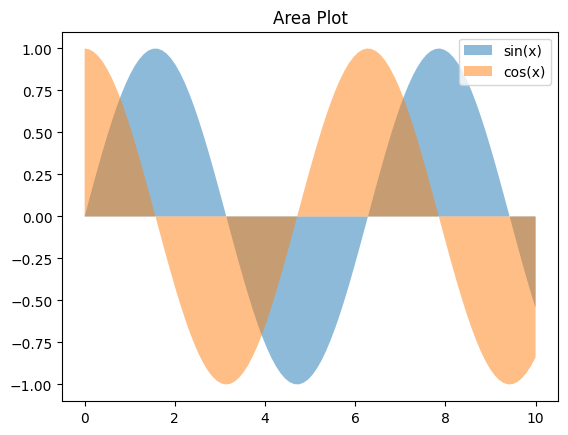

In [69]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.fill_between(x, y1, alpha=0.5, label='sin(x)')
plt.fill_between(x, y2, alpha=0.5, label='cos(x)')
plt.legend()
plt.title('Area Plot')
plt.show()

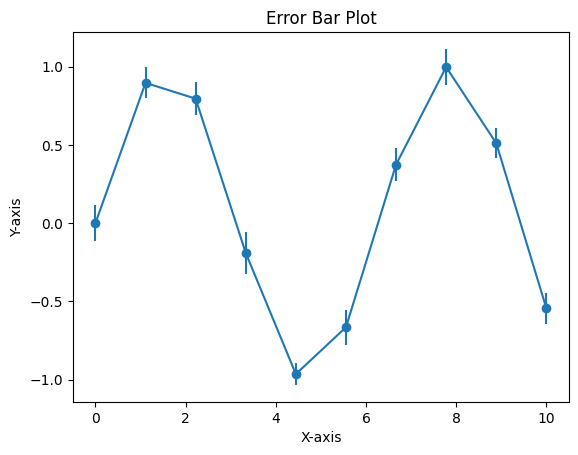

In [70]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
error = np.random.normal(0.1, 0.02, size=y.shape)

plt.errorbar(x, y, yerr=error, fmt='-o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Error Bar Plot')
plt.show()

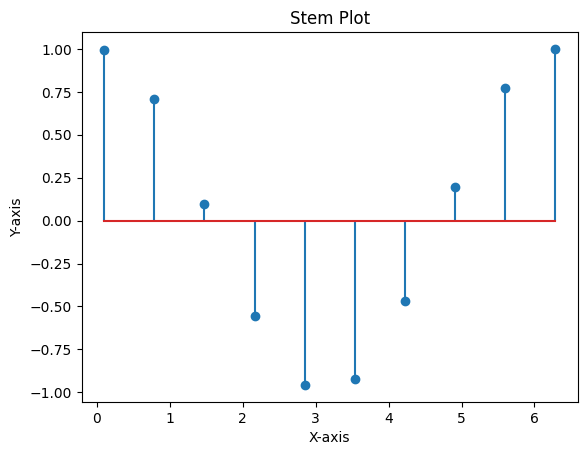

In [71]:
x = np.linspace(0.1, 2 * np.pi, 10)
y = np.cos(x)

plt.stem(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Stem Plot')
plt.show()

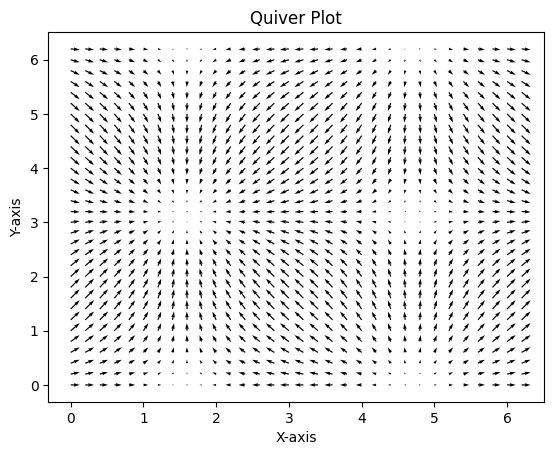

In [72]:
x = np.arange(0, 2 * np.pi, 0.2)
y = np.arange(0, 2 * np.pi, 0.2)
X, Y = np.meshgrid(x, y)
U = np.cos(X)
V = np.sin(Y)

plt.quiver(X, Y, U, V)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Quiver Plot')
plt.show()

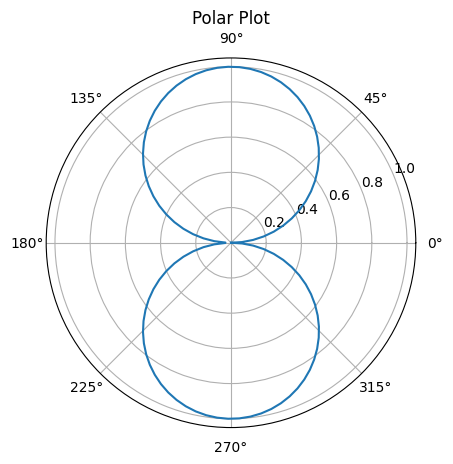

In [73]:
theta = np.linspace(0, 2 * np.pi, 100)
r = np.abs(np.sin(theta))

plt.polar(theta, r)
plt.title('Polar Plot')
plt.show()

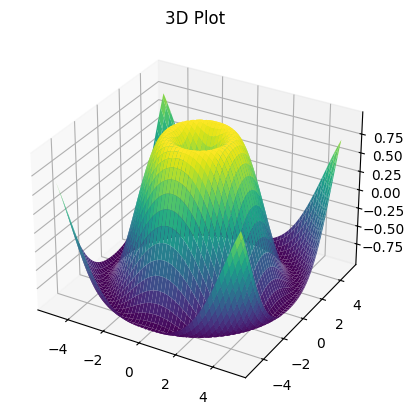

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title('3D Plot')
plt.show()